In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # 1
from sklearn.metrics import confusion_matrix,roc_curve,auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # 2
from sklearn.linear_model import LogisticRegression# 3
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Patience\Desktop\webfalaa documents\new_framingham (1).csv")

In [3]:
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,48,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,61,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,46,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days
5,Female,43,Secondary Edu,No,0.0,No,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,No,15695 days
6,Female,63,Primary Edu,No,0.0,No,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,Yes,22995 days
7,Female,45,Secondary Edu,Yes,20.0,No,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,No,16425 days
8,Male,52,Primary Edu,No,0.0,No,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,No,18980 days
9,Male,43,Primary Edu,Yes,30.0,No,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,No,15695 days


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_in_days          0
dtype: int64

In [5]:
def missing_value(column_name):
    if df.dtypes[column_name] == "O":
        replace= df[column_name].mode()[0]
    elif df[column_name].mean() > df[column_name].std():
        replace=df[column_name].mean()
    else:
        replace= df[column_name].median()

    df[column_name].fillna(replace, inplace=True)

missing_value("education")
missing_value("cigsPerDay")
missing_value("BPMeds")
missing_value("totChol")
missing_value("BMI")
missing_value("heartRate")
missing_value("glucose")

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_in_days        0
dtype: int64

In [7]:
#convert to numeric value

In [8]:
df.rename(columns={"male" : "gender"}, inplace = True) #rename male column to gender

In [9]:
df.head(5)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,39,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,46,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,48,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,61,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,46,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [10]:
df.drop(columns=["age"], inplace = True)

In [11]:
df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,post grad,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,Secondary Edu,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,Primary Edu,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,Tertiary Edu,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,Tertiary Edu,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [12]:
df.education.describe

<bound method NDFrame.describe of 0           post grad
1       Secondary Edu
2         Primary Edu
3        Tertiary Edu
4        Tertiary Edu
            ...      
4235    Secondary Edu
4236      Primary Edu
4237    Secondary Edu
4238     Tertiary Edu
4239     Tertiary Edu
Name: education, Length: 4240, dtype: object>

In [13]:
df.education = df.education.apply(lambda x : 1 if x=="Primary Edu" else 2 if x=="Secondary Edu" else 3 if x=="Tertiary Edu" else 4)

<Axes: >

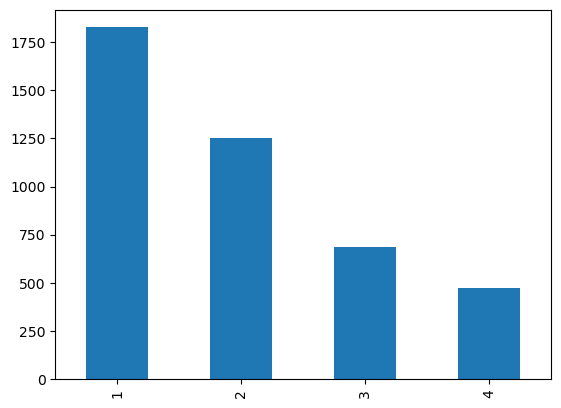

In [14]:
df.education.value_counts().plot(kind ="bar")

In [15]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [16]:
df.currentSmoker.describe

<bound method NDFrame.describe of 0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
4235    Yes
4236    Yes
4237     No
4238     No
4239    Yes
Name: currentSmoker, Length: 4240, dtype: object>

In [17]:
df.currentSmoker = df.currentSmoker.apply(lambda x : 1 if x =="Yes" else 0)

<Axes: >

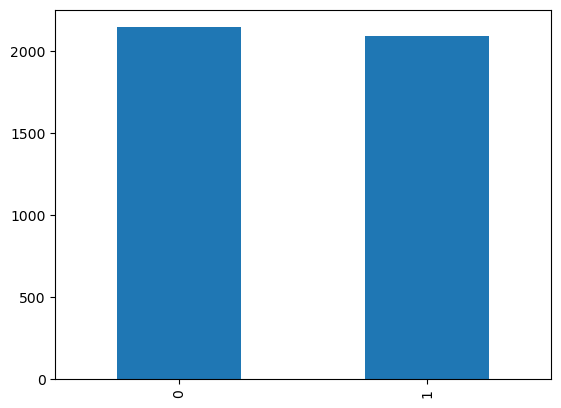

In [18]:
df.currentSmoker.value_counts().plot(kind = "bar")

In [19]:
df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,0,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,1,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,1,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,1,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [20]:
df.BPMeds.describe

<bound method NDFrame.describe of 0       No
1       No
2       No
3       No
4       No
        ..
4235    No
4236    No
4237    No
4238    No
4239    No
Name: BPMeds, Length: 4240, dtype: object>

In [21]:
df.BPMeds = df.BPMeds.apply(lambda x : 1 if x=="Yes" else 0)

<Axes: >

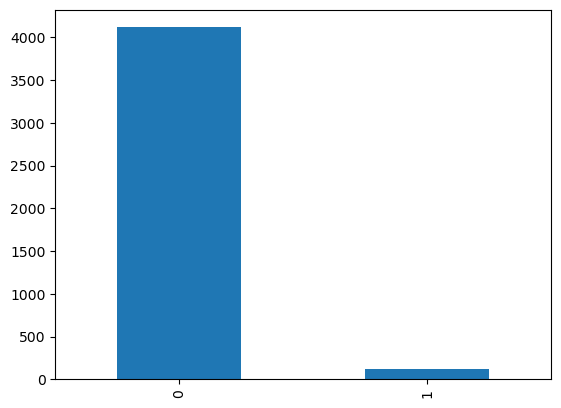

In [22]:
df.BPMeds.value_counts().plot(kind = "bar")

In [23]:
df.head(10)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,0,0.0,0,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,1,20.0,0,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,1,30.0,0,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,1,23.0,0,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days
5,Female,2,0,0.0,0,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,No,15695 days
6,Female,1,0,0.0,0,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,Yes,22995 days
7,Female,2,1,20.0,0,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,No,16425 days
8,Male,1,0,0.0,0,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,No,18980 days
9,Male,1,1,30.0,0,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,No,15695 days


In [24]:
df.prevalentStroke

0       No
1       No
2       No
3       No
4       No
        ..
4235    No
4236    No
4237    No
4238    No
4239    No
Name: prevalentStroke, Length: 4240, dtype: object

In [25]:
df.prevalentStroke = df.prevalentStroke.apply(lambda x: 1 if x =="Yes" else 0)

<Axes: >

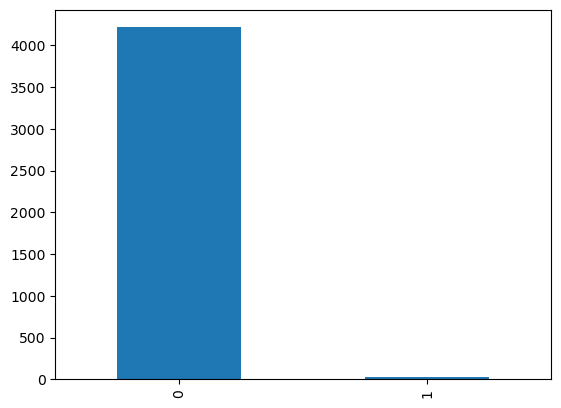

In [26]:
df.prevalentStroke.value_counts().plot(kind = "bar")

In [27]:
df.head()

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,0,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,0,0.0,0,0,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,1,20.0,0,0,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,1,30.0,0,0,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,1,23.0,0,0,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [28]:
df.prevalentHyp = df.prevalentHyp.apply(lambda x: 1 if x =="Yes" else 0)

<Axes: >

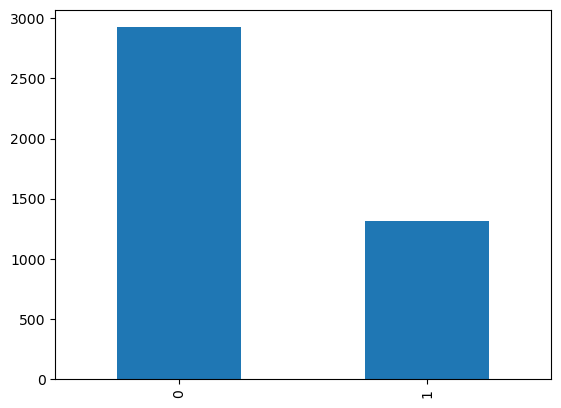

In [29]:
df.prevalentHyp.value_counts().plot(kind = "bar")

In [30]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,0,0.0,0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,1,20.0,0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,1,30.0,0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,1,23.0,0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [31]:
df.diabetes= df.diabetes.apply(lambda x : 1 if x =="Yes" else 0)

<Axes: >

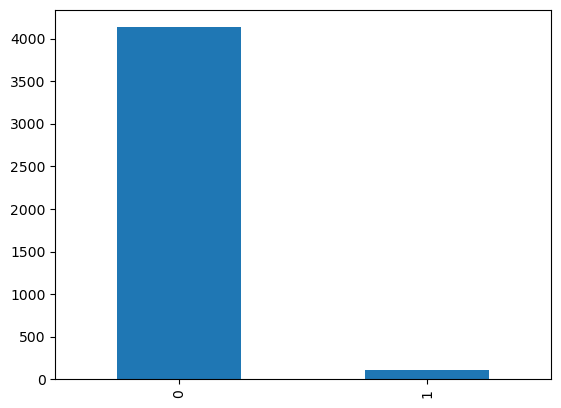

In [32]:
df.diabetes.value_counts().plot(kind="bar")

In [33]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No,14235 days
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No,16790 days
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No,17520 days
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,22265 days
4,Female,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No,16790 days


In [34]:
df.TenYearCHD = df.TenYearCHD.apply(lambda x : 1 if x == "Yes" else 0)

<Axes: >

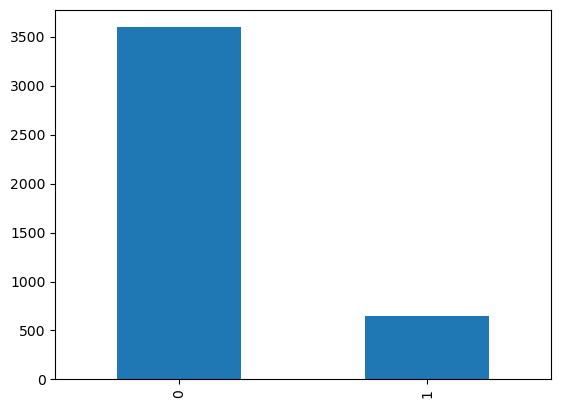

In [35]:
df.TenYearCHD.value_counts().plot(kind ="bar")

In [36]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days
4,Female,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,16790 days


<Axes: >

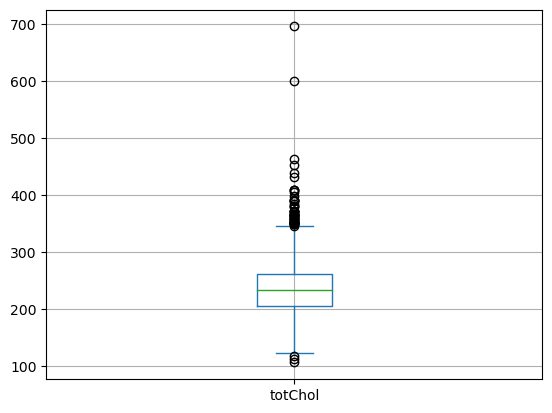

In [37]:
df['totChol'].plot(kind='box', grid=True)   

In [38]:
df.totChol.describe()

count    4240.000000
mean      236.699523
std        44.327521
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64

In [39]:
df['totChol'] = df.totChol.apply(lambda x: x if x < 263 else 263)

In [40]:
df.sysBP.describe()

count    4240.000000
mean      132.354599
std        22.033300
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

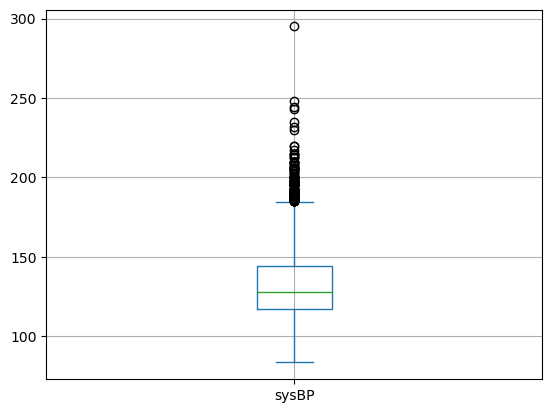

In [41]:
df['sysBP'].plot(kind='box', grid=True)

In [42]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days
4,Female,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days


In [43]:
df["days"]= df["age_in_days"].str.strip("days")

In [44]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_in_days,days
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235 days,14235
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790 days,16790
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520 days,17520
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265 days,22265
4,Female,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790 days,16790


In [45]:
df.drop(columns = ['age_in_days'], inplace = True)

In [46]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,days
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265
4,Female,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790


In [47]:
df['days'] = df['days'].astype(int)

In [48]:
df['age'] = df['days']//365

In [49]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,days,age
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,14235,39
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,16790,46
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,17520,48
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,22265,61
4,Female,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,16790,46


In [50]:
df.drop(columns=["days"], inplace = True)

In [51]:
df.head(5)

,gender,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age
0,Male,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,39
1,Female,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46
2,Male,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,48
3,Female,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,61
4,Female,3,1,23.0,0,0,0,0,263.0,130.0,84.0,23.10,85.0,85.0,0,46


In [52]:
df.to_csv("Machine_learning.csv")